In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#Generate the Cities List by Using the citipy Library
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 648


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{url}appid={weather_api_key}&units={units}&q="

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        
               # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | santa cruz
Processing Record 7 of Set 1 | meulaboh
Processing Record 8 of Set 1 | det udom
Processing Record 9 of Set 1 | beira
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | halalo
City not found. Skipping...
Processing Record 17 of Set 1 | povenets
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | jasper
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | suzhou
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Se

Processing Record 38 of Set 4 | marv dasht
City not found. Skipping...
Processing Record 39 of Set 4 | derzhavinsk
Processing Record 40 of Set 4 | poronaysk
Processing Record 41 of Set 4 | mirnyy
Processing Record 42 of Set 4 | chifeng
Processing Record 43 of Set 4 | chunskiy
Processing Record 44 of Set 4 | shirokiy
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | udachnyy
Processing Record 48 of Set 4 | ruwi
Processing Record 49 of Set 4 | thinadhoo
Processing Record 0 of Set 5 | sur
Processing Record 1 of Set 5 | kajaani
Processing Record 2 of Set 5 | kousseri
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | kingman
Processing Record 5 of Set 5 | buon me thuot
City not found. Skipping...
Processing Record 6 of Set 5 | kapaa
Processing Record 7 of Set 5 | buala
Processing Record 8 of Set 5 | mandurah
Processing Record 9 of Set 5 | candido mendes
Processing Record 10 of Set 5 | labuhan
Processing Rec

Processing Record 24 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 25 of Set 8 | anloga
Processing Record 26 of Set 8 | jalu
Processing Record 27 of Set 8 | coulihaut
City not found. Skipping...
Processing Record 28 of Set 8 | puerto ayacucho
Processing Record 29 of Set 8 | forbes
Processing Record 30 of Set 8 | champerico
Processing Record 31 of Set 8 | ferrol
Processing Record 32 of Set 8 | wilmington island
Processing Record 33 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 34 of Set 8 | clyde river
Processing Record 35 of Set 8 | lumeje
Processing Record 36 of Set 8 | kongolo
Processing Record 37 of Set 8 | upington
Processing Record 38 of Set 8 | obo
Processing Record 39 of Set 8 | hoquiam
Processing Record 40 of Set 8 | tsienyane
City not found. Skipping...
Processing Record 41 of Set 8 | aykhal
Processing Record 42 of Set 8 | muros
Processing Record 43 of Set 8 | macusani
Processing Record 44 of Set 8 | ushtobe
Processing Record 45

Processing Record 13 of Set 12 | itoman
Processing Record 14 of Set 12 | komsomolskiy
Processing Record 15 of Set 12 | manavgat
Processing Record 16 of Set 12 | cockburn town
Processing Record 17 of Set 12 | husavik
Processing Record 18 of Set 12 | ocampo
Processing Record 19 of Set 12 | jardim
Processing Record 20 of Set 12 | deputatskiy
Processing Record 21 of Set 12 | dali
Processing Record 22 of Set 12 | sawakin
Processing Record 23 of Set 12 | jorochito
Processing Record 24 of Set 12 | tilichiki
Processing Record 25 of Set 12 | sidi ali
Processing Record 26 of Set 12 | korhogo
Processing Record 27 of Set 12 | okha
Processing Record 28 of Set 12 | constitucion
Processing Record 29 of Set 12 | bhawanipatna
Processing Record 30 of Set 12 | naze
Processing Record 31 of Set 12 | benguela
Processing Record 32 of Set 12 | mgandu
Processing Record 33 of Set 12 | kuytun
Processing Record 34 of Set 12 | henties bay
Processing Record 35 of Set 12 | arica
Processing Record 36 of Set 12 | yuri

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.7667,114.6000,18.23,55,0,5.66,AU,1670362975
1,mar del plata,-38.0023,-57.5575,22.68,78,20,7.72,AR,1670362771
2,bluff,-46.6000,168.3333,13.22,55,1,7.19,NZ,1670362976
3,punta arenas,-53.1500,-70.9167,10.06,40,40,13.38,CL,1670362517
4,vaini,-21.2000,-175.2000,28.09,83,75,3.60,TO,1670362977


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,18.23,55,0,5.66,AU,1670362975
1,mar del plata,-38.0023,-57.5575,22.68,78,20,7.72,AR,1670362771
2,bluff,-46.6000,168.3333,13.22,55,1,7.19,NZ,1670362976
3,punta arenas,-53.1500,-70.9167,10.06,40,40,13.38,CL,1670362517
4,vaini,-21.2000,-175.2000,28.09,83,75,3.60,TO,1670362977


<IPython.core.display.Javascript object>


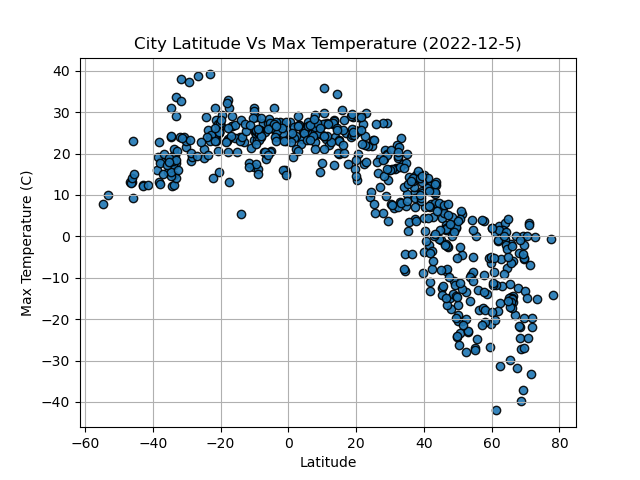

In [19]:
%matplotlib notebook

# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, alpha=0.9, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature (C)')
plt.title(f'City Latitude Vs Max Temperature (2022-12-5)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

<IPython.core.display.Javascript object>


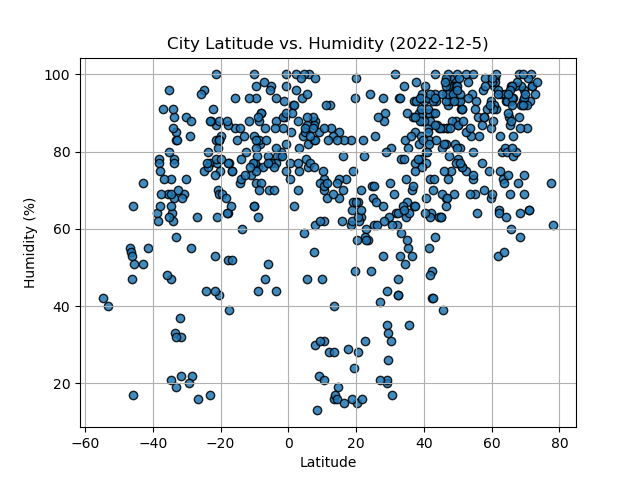

In [20]:
%matplotlib notebook

# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, alpha=0.85, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel(f'Humidity (%)')
plt.title(f'City Latitude vs. Humidity (2022-12-5)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

<IPython.core.display.Javascript object>


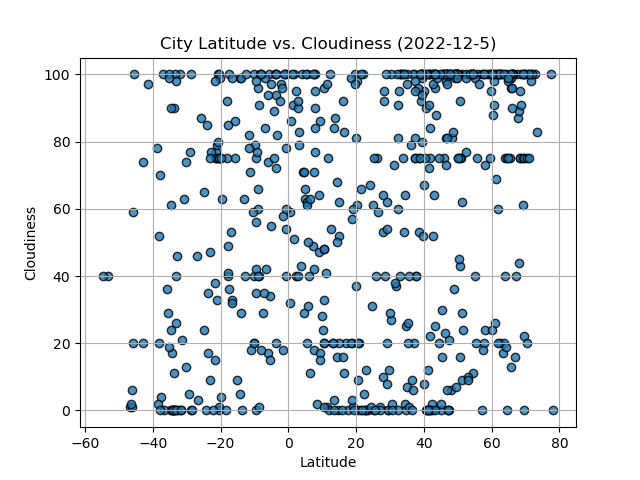

In [21]:
%matplotlib notebook

# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, alpha=0.8, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness')
plt.title(f'City Latitude vs. Cloudiness (2022-12-5)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

<IPython.core.display.Javascript object>


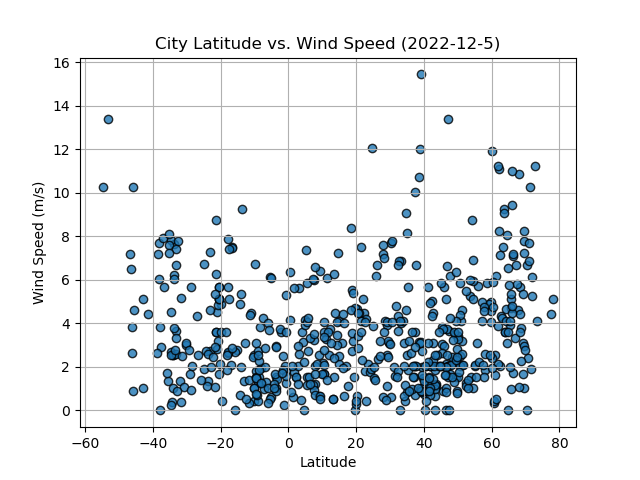

In [22]:
%matplotlib notebook

# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, alpha=0.8, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed (2022-12-5)')
plt.grid()

# Save the figure


# Show plot
plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.drop(city_data_df[city_data_df['Lat'] < 0].index)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,meulaboh,4.1363,96.1285,23.60,94,100,3.59,ID,1670362977
7,det udom,14.9060,105.0784,19.90,85,52,2.13,TH,1670362978
10,lagoa,39.0500,-27.9833,14.73,78,100,15.45,PT,1670362979
12,aklavik,68.2191,-135.0107,-22.00,64,75,5.66,CA,1670362980
13,longyearbyen,78.2186,15.6401,-14.09,61,0,5.14,SJ,1670362980


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.drop(city_data_df[city_data_df['Lat'] >= 0].index)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,18.23,55,0,5.66,AU,1670362975
1,mar del plata,-38.0023,-57.5575,22.68,78,20,7.72,AR,1670362771
2,bluff,-46.6000,168.3333,13.22,55,1,7.19,NZ,1670362976
3,punta arenas,-53.1500,-70.9167,10.06,40,40,13.38,CL,1670362517
4,vaini,-21.2000,-175.2000,28.09,83,75,3.60,TO,1670362977


y = -0.7x +32.77


<IPython.core.display.Javascript object>


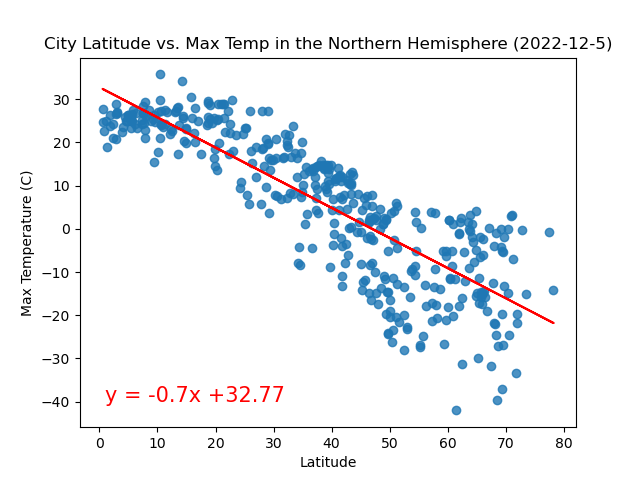

The r-value is: 0.7127573648829575


In [53]:
%matplotlib notebook
from scipy import stats
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature (C)')
plt.annotate(line_eq,(1, -40),fontsize=15,color="red")
plt.title(f'City Latitude vs. Max Temp in the Northern Hemisphere (2022-12-5)')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.19x +26.34


<IPython.core.display.Javascript object>


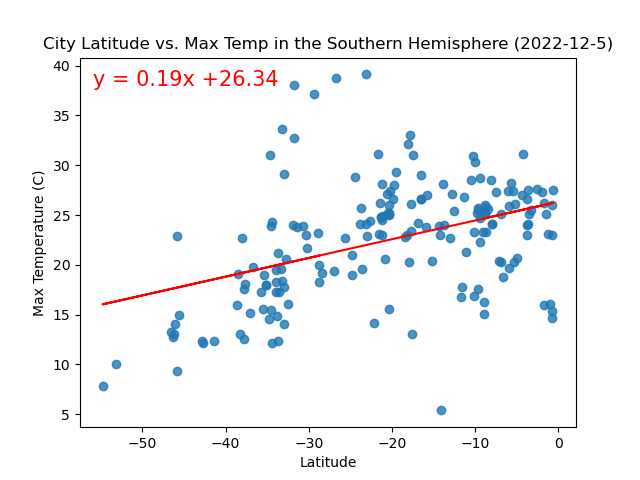

The r-value is: 0.1717102547727179


In [54]:
%matplotlib notebook

# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature (C)')
plt.annotate(line_eq,(-56, 38),fontsize=15,color="red")
plt.title(f'City Latitude vs. Max Temp in the Southern Hemisphere (2022-12-5)')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

max temp generally increases as latitudes approach the equater as demonstrated with the correlated negative linear regression in the northern hemisphere and positive linear regression in the southern hemisphere's city latitude vs max temp scatter plots.

y = 0.36x +62.61


<IPython.core.display.Javascript object>


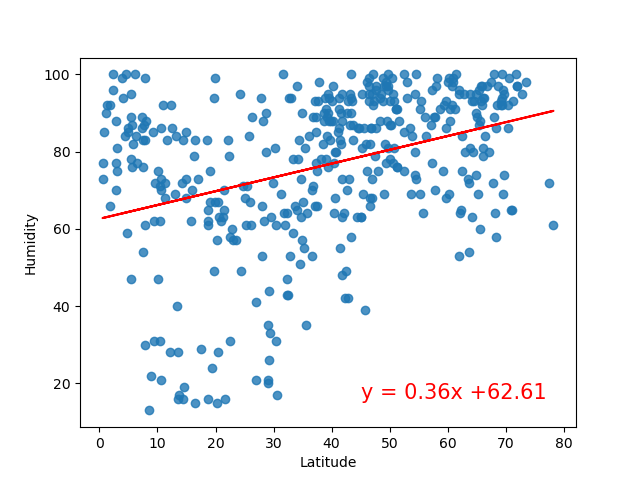

The r-value is: 0.12804686959706127


In [33]:
%matplotlib notebook

# Humidity vs. Latitude Linear Regression Plot
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45, 16),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.63x +84.65


<IPython.core.display.Javascript object>


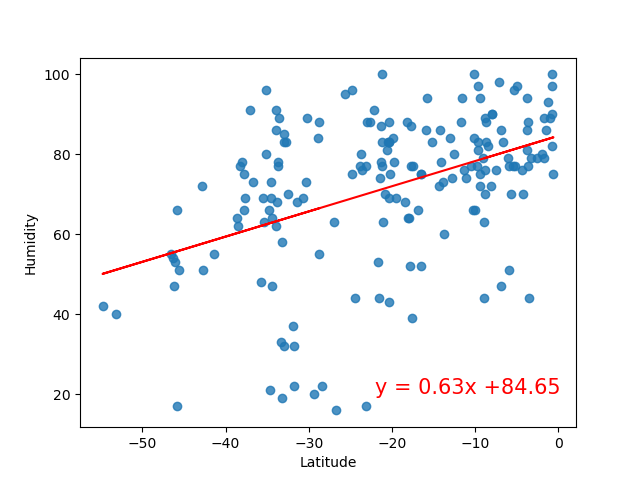

The r-value is: 0.19218166617015936


In [37]:
%matplotlib notebook

# Humidity vs. Latitude Linear Regression Plot
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-22, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

higher latitudes display more frequently high humidity percentages

y = 0.49x +43.14


<IPython.core.display.Javascript object>


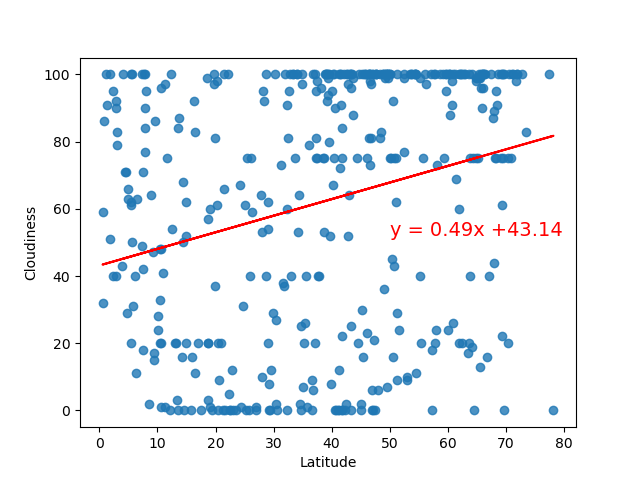

The r-value is: 0.06948649805813839


In [42]:
###***Convert to C and Change Cloudiness to Numbers
%matplotlib notebook

#Cloudiness vs. Latitude Linear Regression Plot
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(50, 52),fontsize=14,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = 0.95x +71.75


<IPython.core.display.Javascript object>


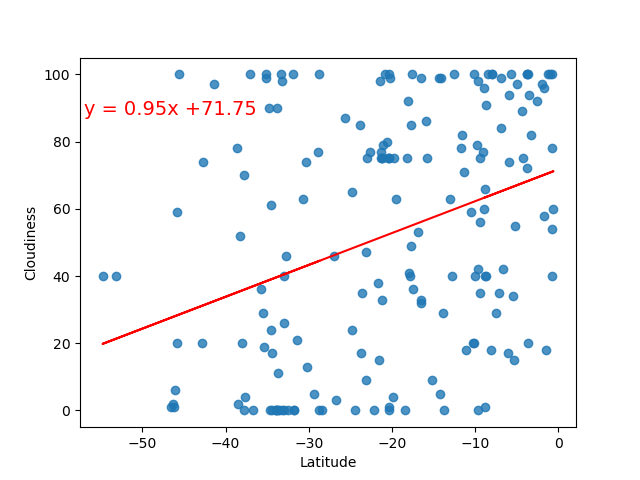

The r-value is: 0.11677909674847416


In [45]:
%matplotlib notebook

#Cloudiness vs. Latitude Linear Regression Plot
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-57, 88),fontsize=14,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

more instances of cloud cover presented in the northern hemisphere
data is all over the place so the linear regression is not well suited for drawing strong conclusions

y = 0.03x +2.48


<IPython.core.display.Javascript object>


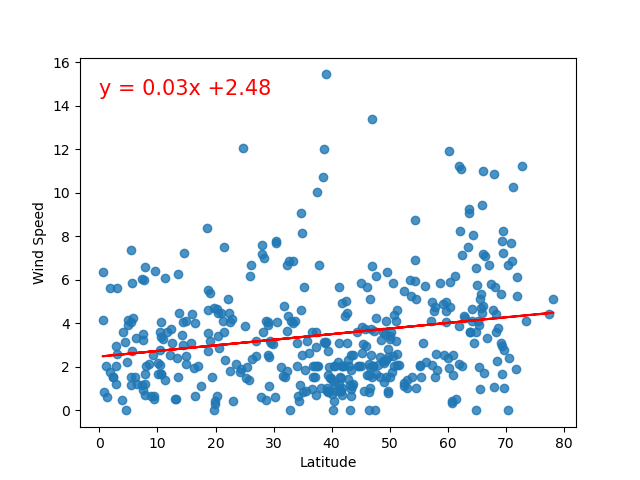

The r-value is: 0.04253821478039325


In [47]:
%matplotlib notebook

#Wind Speed vs. Latitude Linear Regression Plot
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(0, 14.5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.08x +1.84


<IPython.core.display.Javascript object>


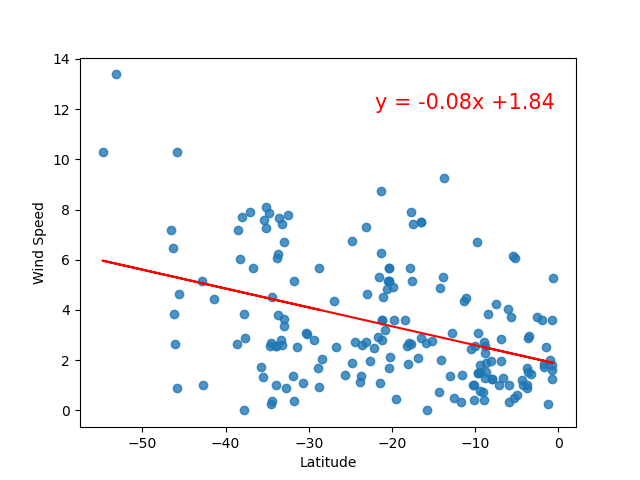

The r-value is: 0.16132839149477254


In [50]:
%matplotlib notebook

#Wind Speed vs. Latitude Linear Regression Plot
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-22, 12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()